In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Load the data
data = pd.read_excel('Customer Bank Muamalat.xlsx')
data.head()

,age,job,marital,education,default,balance,housing,loan,deposit
0,59,admin.,married,secondary,no,2343,yes,no,yes
1,56,admin.,married,secondary,no,45,no,no,yes
2,41,technician,married,secondary,no,1270,yes,no,yes
3,55,services,married,secondary,no,2476,yes,no,yes
4,54,admin.,married,tertiary,no,184,no,no,yes


In [ ]:
# Checking data type, missing value and attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   deposit    11162 non-null  object
dtypes: int64(2), object(7)
memory usage: 785.0+ KB


Text(0.5, 1.0, 'Age Distribution')

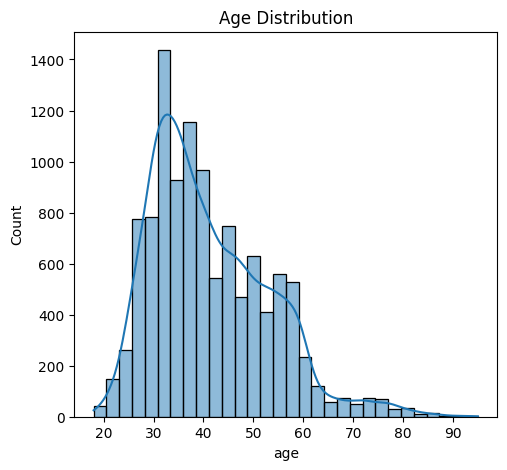

In [ ]:
# Visualize the distribution of numerical features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')

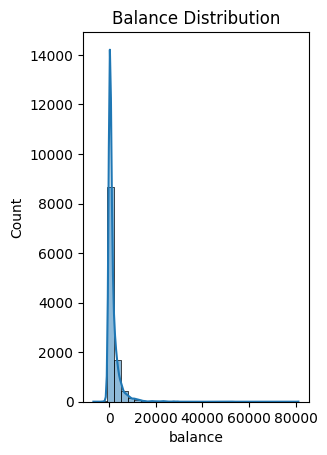

In [ ]:
plt.subplot(1, 2, 2)
sns.histplot(data['balance'], bins=30, kde=True)
plt.title('Balance Distribution')
plt.show()

Text(0.5, 1.0, 'Boxplot of Age')

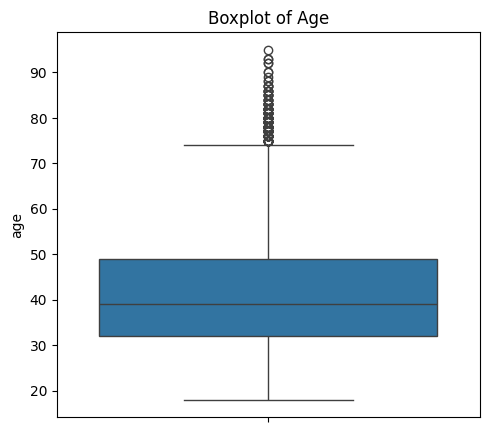

In [ ]:
# Create a boxplot for 'age'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data['age'])
plt.title('Boxplot of Age')

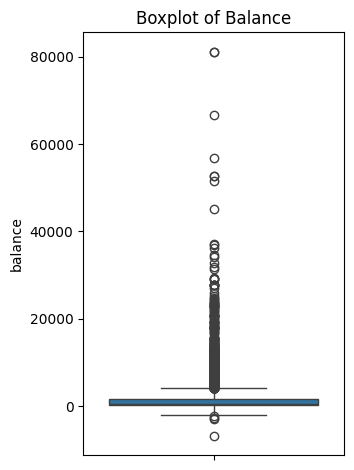

In [ ]:
# Create a boxplot for 'balance'
plt.subplot(1, 2, 2)
sns.boxplot(data['balance'])
plt.title('Boxplot of Balance')

plt.tight_layout()
plt.show()

In [ ]:
# Select only object columns
object_columns = data.select_dtypes(include=['object']).columns

# Print unique values for each object column
for column in object_columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}':\n{unique_values}\n")

Unique values in column 'job':
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']

Unique values in column 'marital':
['married' 'single' 'divorced']

Unique values in column 'education':
['secondary' 'tertiary' 'primary' 'unknown']

Unique values in column 'default':
['no' 'yes']

Unique values in column 'housing':
['yes' 'no']

Unique values in column 'loan':
['no' 'yes']

Unique values in column 'deposit':
['yes' 'no']



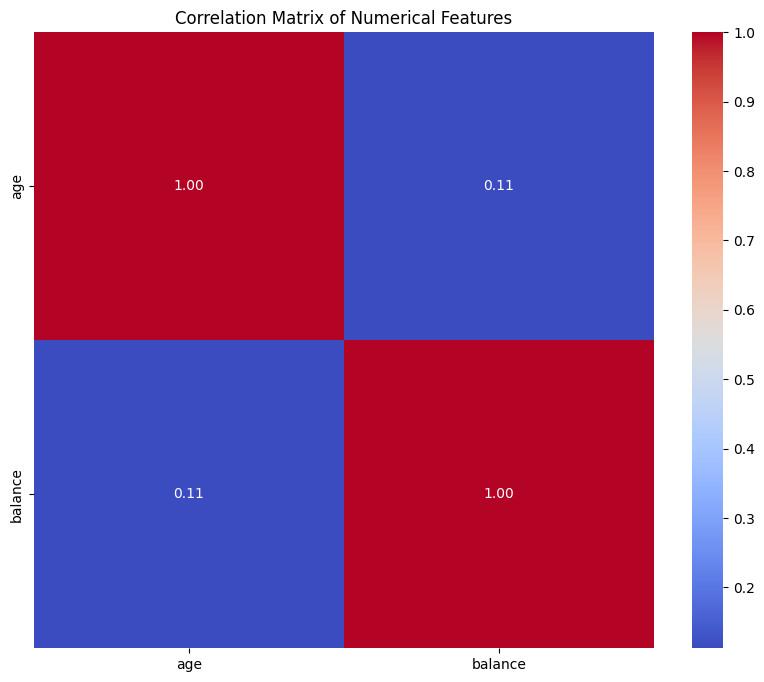

In [ ]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numerical_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
# Replace 'admin.' with 'administrator' in the 'job' column
data['job'] = data['job'].replace('admin.', 'administrator')

In [ ]:
# Count 'unknown' values in 'job' and 'education'
unknown_job_count = data['job'].value_counts().get('unknown', 0)
unknown_education_count = data['education'].value_counts().get('unknown', 0)

# Display the counts
print(f"Number of 'unknown' values in 'job': {unknown_job_count}")
print(f"Number of 'unknown' values in 'education': {unknown_education_count}")

Number of 'unknown' values in 'job': 70
Number of 'unknown' values in 'education': 497


In [ ]:
# Replace 'unknown' in 'job' and 'education' with the mode of each column
for column in ['job', 'education']:
    mode_value = data[column].mode()[0]  # Get the mode (most common value)
    data[column] = data[column].replace('unknown', mode_value)
# Display unique values to verify the change
for column in ['job', 'education']:
    print(f"Unique values in '{column}' column after replacing 'unknown':")
    print(data[column].unique())

Unique values in 'job' column after replacing 'unknown':
['administrator' 'technician' 'services' 'management' 'retired'
 'blue-collar' 'unemployed' 'entrepreneur' 'housemaid' 'self-employed'
 'student']
Unique values in 'education' column after replacing 'unknown':
['secondary' 'tertiary' 'primary']


In [ ]:
# Remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]

data = remove_outliers(data, 'balance')
data = remove_outliers(data, 'age')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9932 entries, 0 to 11161
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9932 non-null   int64 
 1   job        9932 non-null   object
 2   marital    9932 non-null   object
 3   education  9932 non-null   object
 4   default    9932 non-null   object
 5   balance    9932 non-null   int64 
 6   housing    9932 non-null   object
 7   loan       9932 non-null   object
 8   deposit    9932 non-null   object
dtypes: int64(2), object(7)
memory usage: 775.9+ KB


In [ ]:
data_clean = data

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# List of categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'deposit']

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])

# Display the first few rows of the transformed dataset
data.head()


,age,job,marital,education,default,balance,housing,loan,deposit
0,59,0,1,1,0,2343,1,0,1
1,56,0,1,1,0,45,0,0,1
2,41,9,1,1,0,1270,1,0,1
3,55,7,1,1,0,2476,1,0,1
4,54,0,1,2,0,184,0,0,1


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


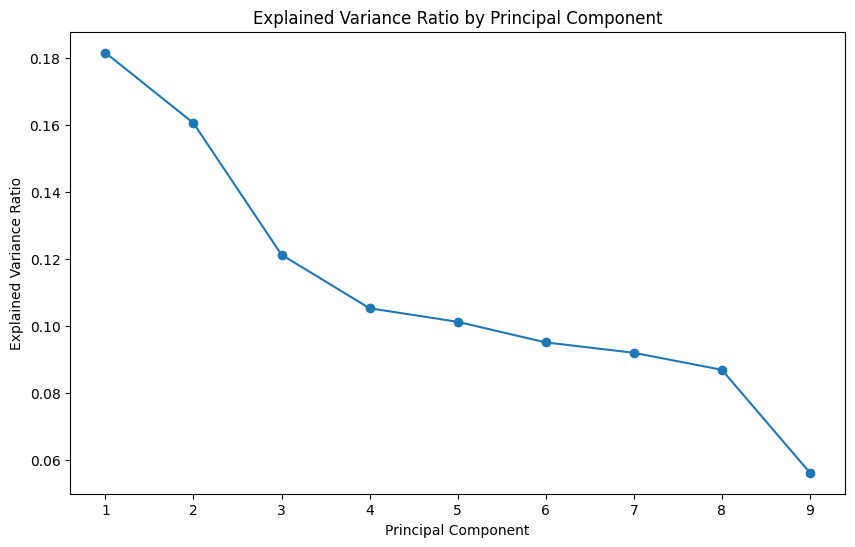

In [ ]:
# Standardize the numerical data for PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA
pca = PCA()
pca.fit(data_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

Grafik menunjukkan bahwa penurunan rasio variansi yang dijelaskan mulai
melambat setelah komponen ke-3 atau ke-4. Menggunakan 3 atau 4 komponen memungkinkan untuk menjelaskan lebih banyak variansi dengan sedikit tambahan kompleksitas.

In [ ]:
# Select important features based on PCA components
important_features = pd.DataFrame(pca.components_, columns=data.columns)
print("Top features from PCA:")
print(important_features)

Top features from PCA:
        age       job   marital  education   default   balance   housing  \
0  0.419085 -0.313939 -0.515409  -0.428772  0.107926 -0.163914  0.251861   
1  0.549061  0.122721 -0.358922   0.023478 -0.172318  0.412907 -0.428611   
2  0.121358  0.393866 -0.129265   0.220060  0.620229 -0.371282 -0.368469   
3 -0.070208 -0.623463  0.208662  -0.266604  0.450596  0.089997 -0.176502   
4  0.041169  0.137734 -0.012754  -0.166373  0.406596 -0.152362  0.140626   
5  0.002132 -0.071789 -0.125938   0.466613  0.427501  0.632982  0.383041   
6 -0.048537  0.441496  0.284251  -0.643184  0.151055  0.457180 -0.077862   
7 -0.053203  0.351279 -0.216422  -0.146005 -0.000749 -0.096708  0.588132   
8 -0.704526 -0.010242 -0.633735  -0.125256  0.006544  0.120183 -0.259766   

       loan   deposit  
0  0.247466 -0.336346  
1 -0.243195  0.333256  
2  0.323760  0.043382  
3  0.021564  0.498992  
4 -0.847291 -0.158998  
5  0.082826 -0.155723  
6  0.201209 -0.172810  
7  0.075965  0.666779  


Setiap 3 fitur dengan loadings tertinggi di PC1 - PC4 akan dipilih dan digabungkan yang menghasilkan kesimpulan bahwa yang optimal adalah menggunakan semua fitur yang ada atau tidak melakukan eliminasi fitur

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

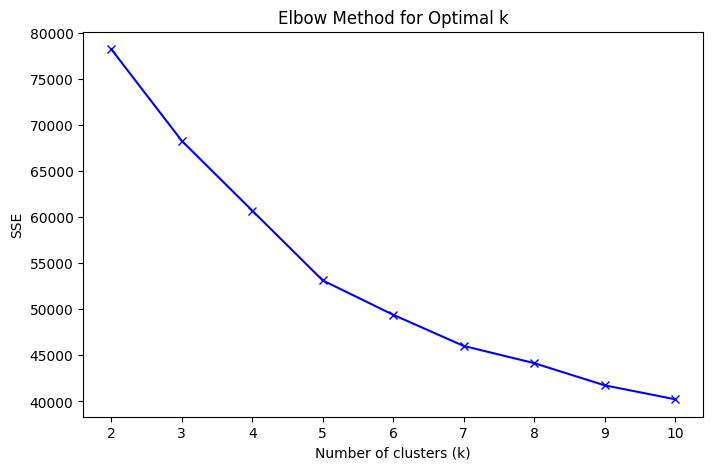

In [ ]:
# Determine number of cluster with elbow method
sse = []

k_range = range(2, 11)  # Check for 2 to 10 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
sse_diff = [sse[i] - sse[i + 1] for i in range(len(sse) - 1)]
best_k = sse_diff.index(max(sse_diff)) + 2  # +2 because k_range starts at 2

best_k

2

In [ ]:
# Fit the K-Means model with the optimal number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42)
data_clean['cluster'] = kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


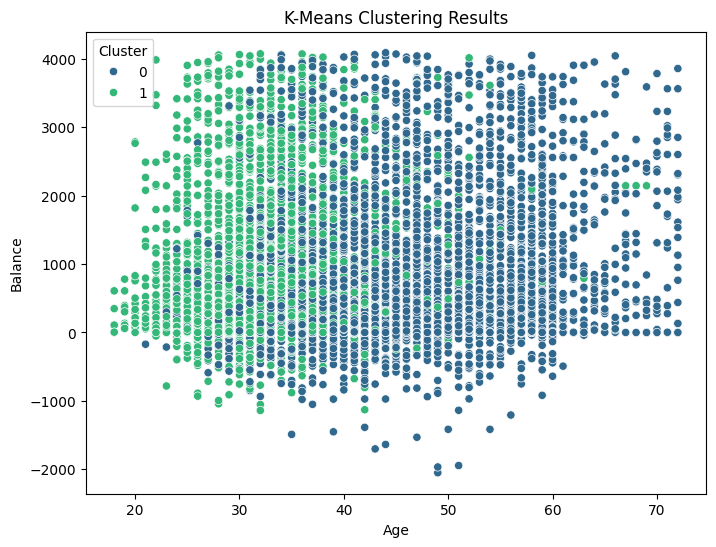

In [ ]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='balance', hue='cluster', data=data_clean, palette='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend(title='Cluster')
plt.show()

In [ ]:
data_clean.head()

,age,job,marital,education,default,balance,housing,loan,deposit,cluster
0,59,administrator,married,secondary,no,2343,yes,no,yes,0
1,56,administrator,married,secondary,no,45,no,no,yes,0
2,41,technician,married,secondary,no,1270,yes,no,yes,1
3,55,services,married,secondary,no,2476,yes,no,yes,0
4,54,administrator,married,tertiary,no,184,no,no,yes,0


In [ ]:
# Save the data to a new CSV file
data_clean.to_csv('Customer_Bank_Muamalat_with_Clusters.csv', index=False)